In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import helper as t
pd.options.mode.chained_assignment = None  # default='warn'

from IPython import display
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns
sns.set(style='darkgrid')

pd.set_option('display.max_columns',85)
pd.set_option('display.max_rows',154)

df = pd.read_csv('./listings.csv')

In [25]:
#df.columns

#### https://www.kaggle.com/airbnb/seattle

In [26]:
df1 = df[['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'property_type', 'room_type','host_response_time',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities','guests_included','cancellation_policy',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location','reviews_per_month',
       'review_scores_value', 'instant_bookable','price']]

In [27]:
def convert_to_float(r):
    result = str(r).replace("$","").replace(",","").replace("%","")
    return round(float(result),2)

def bool_to_int(b):
    if b == 't':
        result = 1
    elif b == 'f':
        result = 0
    else: 
        result = None
    return result
    

In [28]:
col_list = ['price','host_response_rate','host_acceptance_rate']
bool_list = ['host_is_superhost',
             'instant_bookable']

for col in col_list:
    df1[col] = df1[col].apply(convert_to_float)
    
for col in bool_list:
    df1[col] = df1[col].apply(bool_to_int)
    


In [29]:
df1.describe()

,host_response_rate,host_acceptance_rate,host_is_superhost,accommodates,bathrooms,bedrooms,beds,guests_included,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,reviews_per_month,review_scores_value,instant_bookable,price
count,3295.000000,3045.000000,3816.000000,3818.000000,3802.000000,3812.000000,3817.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3191.000000,3162.000000,3818.000000,3818.000000
mean,94.886798,99.967159,0.203878,3.349398,1.259469,1.307712,1.735394,1.672603,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,2.078919,9.452245,0.154793,127.976166
std,11.866705,1.812201,0.402932,1.977599,0.590369,0.883395,1.139480,1.311040,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,1.822348,0.750259,0.361755,90.250022
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,0.020000,2.000000,0.000000,20.000000
25%,98.000000,100.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,0.695000,9.000000,0.000000,75.000000
50%,100.000000,100.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.540000,10.000000,0.000000,100.000000
75%,100.000000,100.000000,0.000000,4.000000,1.000000,2.000000,2.000000,2.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000,10.000000,0.000000,150.000000
max,100.000000,100.000000,1.000000,16.000000,8.000000,7.000000,15.000000,15.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,12.150000,10.000000,1.000000,1000.000000


In [30]:
df1.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,property_type,room_type,host_response_time,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,guests_included,cancellation_policy,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,reviews_per_month,review_scores_value,instant_bookable,price
0,96.0,100.0,0.0,Apartment,Entire home/apt,within a few hours,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,moderate,95.0,10.0,10.0,10.0,10.0,9.0,4.07,10.0,0,85.0
1,98.0,100.0,1.0,Apartment,Entire home/apt,within an hour,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",1,strict,96.0,10.0,10.0,10.0,10.0,10.0,1.48,10.0,0,150.0
2,67.0,100.0,0.0,House,Entire home/apt,within a few hours,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",10,strict,97.0,10.0,10.0,10.0,10.0,10.0,1.15,10.0,0,975.0
3,NaN,NaN,0.0,Apartment,Entire home/apt,NaN,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",1,flexible,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,100.0
4,100.0,NaN,0.0,House,Entire home/apt,within an hour,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",6,strict,92.0,9.0,9.0,10.0,10.0,9.0,0.89,9.0,0,450.0


In [31]:
#df1.columns

In [32]:
def get_all(amenities):
    result = []
    for i in amenities:
        result.append(i)
    return result

def clean(x):
    x = x.replace('"','').replace("{",'').replace("}","")
    result = [word for word in x.split(',')]
    return result

def parse_result(r):
    amenities_list = []
    for i in r:
        for j in i:
            if j:
                amenities_list.append(j)
    return list(set(amenities_list))   

In [33]:
df1['amenities'] = df1['amenities'].apply(clean)

In [34]:
all_amenities_list = list(df1['amenities'].apply(get_all))

In [35]:
all_possible = parse_result(all_amenities_list)

In [36]:
#all_possible

In [37]:
def summarize_data(df):
    '''
    INPUT 
        df - a dataframe holding the amenities column
        
    OUTPUT
        study_df - a dataframe with the amenities count
    '''
    study = df['amenities'].value_counts().reset_index()
    study.rename(columns={'index': 'method', 'amenities': 'count'}, inplace=True)
    study_df = t.total_count(study, 'method', 'count', all_possible)
    
    study_df.set_index('method', inplace=True)
    props_study_df = study_df/df.shape[0] 
    return props_study_df
    
amenities_df = summarize_data(df1)

<AxesSubplot:title={'center':'Price Distribution'}, ylabel='Frequency'>

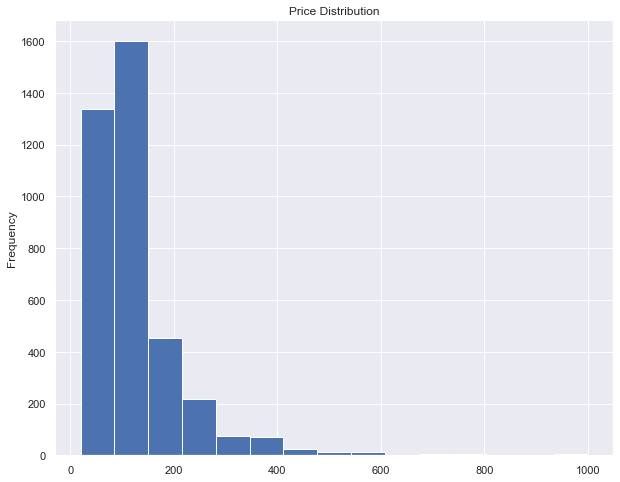

In [38]:
df1['price'].plot(kind='hist',bins=15,figsize=(10,8),title='Price Distribution')

In [39]:
property_types = ((df1['property_type'].value_counts())/df1.shape[0])

In [40]:
property_types

House              0.453903
Apartment          0.447355
Townhouse          0.030906
Condominium        0.023834
Loft               0.010477
Bed & Breakfast    0.009691
Other              0.005762
Cabin              0.005500
Camper/RV          0.003405
Bungalow           0.003405
Boat               0.002095
Tent               0.001310
Treehouse          0.000786
Dorm               0.000524
Chalet             0.000524
Yurt               0.000262
Name: property_type, dtype: float64

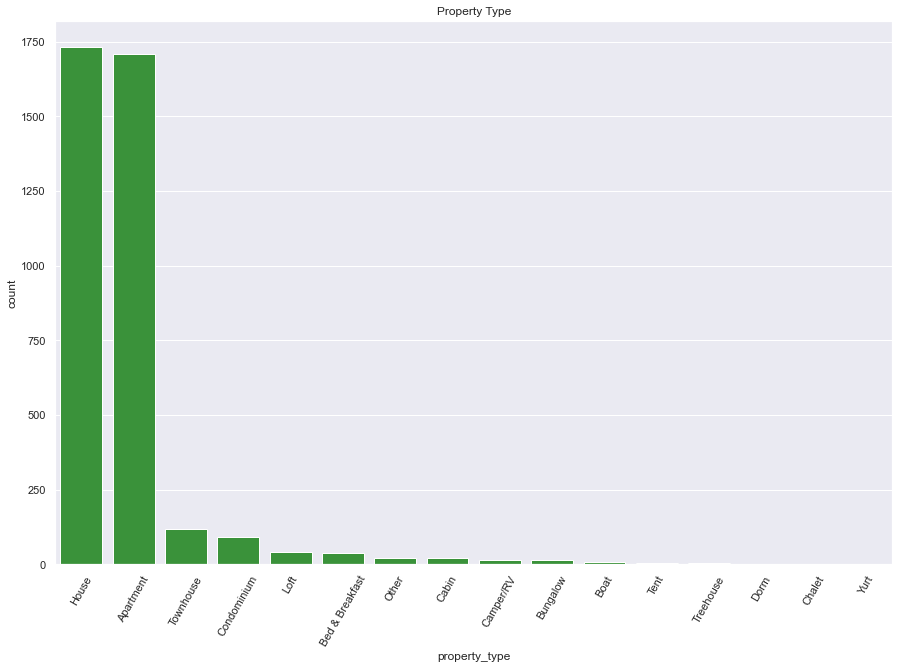

In [79]:
plt.figure(figsize = (15,10))
sns.countplot(x='property_type', data=df1, color='tab:green', order=df1.property_type.value_counts().index)
plt.xticks(rotation=60)
plt.title("Property Type")
plt.show()

In [80]:
#((df1['property_type'].value_counts())/df1.shape[0]).plot(kind='bar',figsize=(10,7))

In [43]:
#dfroom = df1['room_type']

In [44]:
dfroom = (df1['room_type'].value_counts())/df1.shape[0]

In [45]:
dfroom

Entire home/apt    0.665532
Private room       0.303824
Shared room        0.030644
Name: room_type, dtype: float64

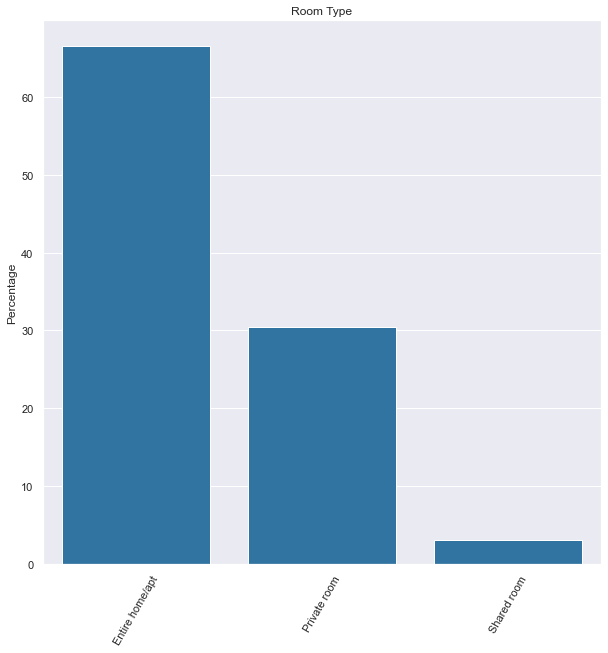

In [88]:
plt.figure(figsize = (10,10))
ax = sns.barplot(x=dfroom.index,y=dfroom.values*100,color="tab:blue")
ax.set(ylabel='Percentage')
plt.xticks(rotation=60)
plt.title("Room Type")
plt.show()

<AxesSubplot:title={'center':'Accomodation Type'}>

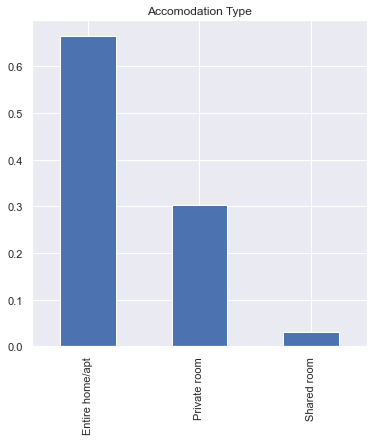

In [47]:
((df1['room_type'].value_counts())/df1.shape[0]).plot(kind='bar', title="Accomodation Type", figsize=(6,6))

In [83]:
#df.property_type.value_counts().plot(kind='bar',figsize=(8,8))

In [93]:
amenities_df['amenity']=amenities_df.index
amenities_df['Percentage'] = amenities_df['count']*100


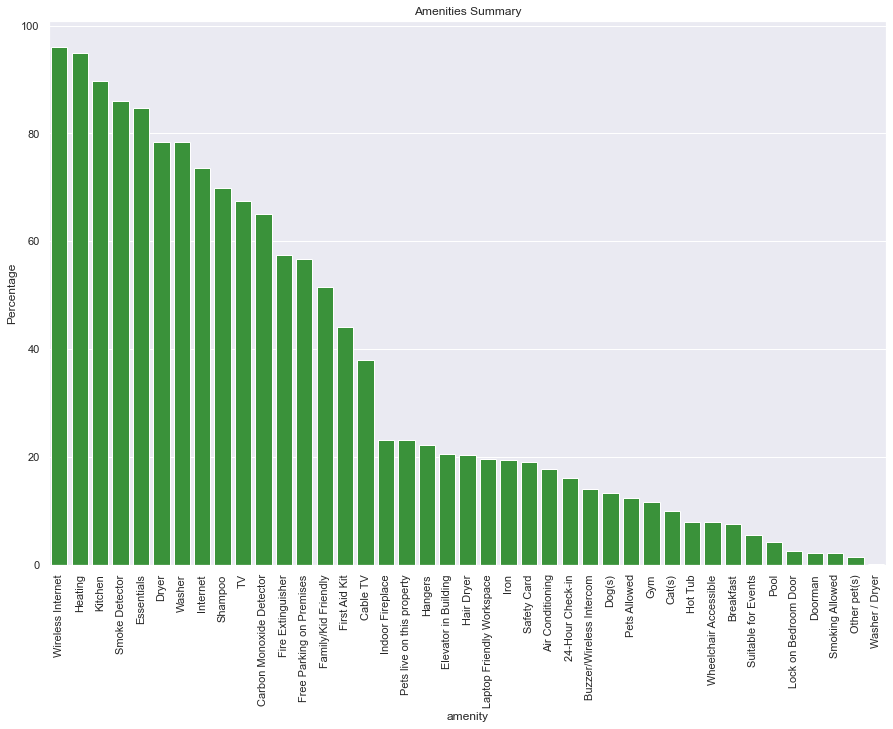

In [95]:
plt.figure(figsize = (15,10))
sns.barplot(x='amenity',y='Percentage',color='tab:green',data=amenities_df)
plt.xticks(rotation=90)
plt.title("Amenities Summary")
plt.show()

In [71]:
#amenities_df.plot(kind='bar', figsize=(11,7),title="Amenities Summary",legend=None)

### Create Dummy Variables for Amenities 

In [52]:
df_fit = df1.join(df1.pop('amenities').str.join('|').str.get_dummies())

In [53]:
df_fit.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,property_type,room_type,host_response_time,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,cancellation_policy,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,reviews_per_month,review_scores_value,instant_bookable,price,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,Elevator in Building,Essentials,Family/Kid Friendly,Fire Extinguisher,First Aid Kit,Free Parking on Premises,Gym,Hair Dryer,Hangers,Heating,Hot Tub,Indoor Fireplace,Internet,Iron,Kitchen,Laptop Friendly Workspace,Lock on Bedroom Door,Other pet(s),Pets Allowed,Pets live on this property,Pool,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
0,96.0,100.0,0.0,Apartment,Entire home/apt,within a few hours,4,1.0,1.0,1.0,Real Bed,2,moderate,95.0,10.0,10.0,10.0,10.0,9.0,4.07,10.0,0,85.0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
1,98.0,100.0,1.0,Apartment,Entire home/apt,within an hour,4,1.0,1.0,1.0,Real Bed,1,strict,96.0,10.0,10.0,10.0,10.0,10.0,1.48,10.0,0,150.0,0,0,0,1,0,1,0,0,0,1,0,1,1,1,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1
2,67.0,100.0,0.0,House,Entire home/apt,within a few hours,11,4.5,5.0,7.0,Real Bed,10,strict,97.0,10.0,10.0,10.0,10.0,10.0,1.15,10.0,0,975.0,0,1,0,0,1,1,1,1,0,1,0,1,1,0,0,1,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1
3,NaN,NaN,0.0,Apartment,Entire home/apt,NaN,3,1.0,0.0,2.0,Real Bed,1,flexible,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,100.0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1
4,100.0,NaN,0.0,House,Entire home/apt,within an hour,6,2.0,3.0,3.0,Real Bed,6,strict,92.0,9.0,9.0,10.0,10.0,9.0,0.89,9.0,0,450.0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1


## Fit Linear Model

In [54]:
nans = (df_fit.isnull().sum())

In [55]:
nans.sort_values(ascending=False).nlargest(18)

host_acceptance_rate           773
review_scores_checkin          658
review_scores_accuracy         658
review_scores_value            656
review_scores_location         655
review_scores_cleanliness      653
review_scores_communication    651
review_scores_rating           647
reviews_per_month              627
host_response_rate             523
host_response_time             523
bathrooms                       16
bedrooms                         6
host_is_superhost                2
beds                             1
property_type                    1
Washer                           0
Iron                             0
dtype: int64

### Remove outliers


In [56]:
drop_list = ['Camper/RV','Boat','Tent','Dorm','Treehouse','Other']
filtr1 = (df_fit['price'] <= 999) & (df_fit['price'] >= 49) & (
          df_fit['bathrooms'] > 0) & (df_fit['bedrooms'] > 0) & (df_fit['accommodates'] < 12) & (
          df_fit['beds'] < 10)
filtr2 = ~df_fit['property_type'].isin(drop_list)
df_fit = df_fit[filtr1 & filtr2]

In [57]:
df_fit = df_fit.copy()

### Drop rows from key columns with null values
### Impute values for remaining null values

In [58]:
col_list = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
            'review_scores_communication','review_scores_checkin',
            'review_scores_location','review_scores_value']
mode_list = ['host_response_time','bathrooms','bedrooms','host_response_time',
             'property_type','beds','host_is_superhost','instant_bookable']
mean_list = ['host_response_rate','host_acceptance_rate','reviews_per_month']

df_fit.dropna(subset=col_list,axis=0,inplace=True)  

for col in mode_list:
    df_fit[col].fillna((df_fit[col].mode()[0]), inplace=True)
    
for col in mean_list:
    df_fit[col].fillna(round(df_fit[col].mean(),1), inplace=True)

In [59]:
df_fit.isnull().sum().sum()

0

In [60]:
#df_fit.property_type.value_counts()

In [61]:
#df_fit.sort_values(by='price').tail()

In [62]:
df_fit.describe()

,host_response_rate,host_acceptance_rate,host_is_superhost,accommodates,bathrooms,bedrooms,beds,guests_included,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,reviews_per_month,review_scores_value,instant_bookable,price,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,Elevator in Building,Essentials,Family/Kid Friendly,Fire Extinguisher,First Aid Kit,Free Parking on Premises,Gym,Hair Dryer,Hangers,Heating,Hot Tub,Indoor Fireplace,Internet,Iron,Kitchen,Laptop Friendly Workspace,Lock on Bedroom Door,Other pet(s),Pets Allowed,Pets live on this property,Pool,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
count,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000
mean,95.166499,99.961315,0.247969,3.538104,1.276789,1.451451,1.802321,1.781818,94.675048,9.652611,9.575242,9.796905,9.820116,9.625532,1.991779,9.457640,0.156673,134.034043,0.141586,0.177950,0.069632,0.141586,0.411605,0.666151,0.103288,0.138491,0.025145,0.806576,0.204255,0.859574,0.566731,0.596132,0.464603,0.602321,0.117602,0.187234,0.194197,0.962476,0.078143,0.248356,0.752418,0.178723,0.900580,0.166731,0.014313,0.015087,0.131915,0.240619,0.047195,0.207350,0.728046,0.873114,0.020890,0.058027,0.704836,0.803482,0.000387,0.084333,0.972534
std,10.870352,1.966843,0.431917,1.858219,0.579483,0.760926,1.082149,1.318325,6.601700,0.670603,0.783344,0.597458,0.550596,0.610003,1.747621,0.748996,0.363563,88.579207,0.348693,0.382544,0.254576,0.348693,0.492220,0.471678,0.304394,0.345482,0.156596,0.395059,0.403234,0.347495,0.495623,0.490767,0.498842,0.489513,0.322198,0.390175,0.395658,0.190079,0.268449,0.432143,0.431691,0.383195,0.299283,0.372808,0.118802,0.121923,0.338464,0.427542,0.212098,0.405487,0.445052,0.332909,0.143043,0.233840,0.456205,0.397442,0.019668,0.277940,0.163469
min,17.000000,0.000000,0.000000,1.000000,0.500000,1.000000,1.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,6.000000,0.020000,2.000000,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,95.200000,100.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,0.650000,9.000000,0.000000,79.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,100.000000,100.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.460000,10.000000,0.000000,110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.

In [63]:
dfc = df_fit[['host_is_superhost','bathrooms','beds','review_scores_rating','bedrooms',
              'accommodates','instant_bookable','host_acceptance_rate','Suitable for Events',
              'price','host_response_rate','24-Hour Check-in','Air Conditioning','Breakfast','Pets Allowed',
              'Cable TV','Cat(s)','Dog(s)','Dryer','Fire Extinguisher','Essentials',
              'Pets live on this property','Pool','Shampoo','Safety Card','Smoke Detector','Smoking Allowed','Washer',
              'Family/Kid Friendly','Free Parking on Premises','Gym','Hair Dryer','Hangers','Heating','Hot Tub',
              'Indoor Fireplace','Internet','Iron','Kitchen','Laptop Friendly Workspace','Lock on Bedroom Door']]

In [64]:
rank_order = dfc.corr(method='pearson').review_scores_rating.sort_values(ascending=False)

In [65]:
rank_order

review_scores_rating          1.000000
host_is_superhost             0.234704
host_response_rate            0.144540
Shampoo                       0.127839
Fire Extinguisher             0.121568
Safety Card                   0.105271
Essentials                    0.080137
Pets live on this property    0.079267
Smoke Detector                0.074206
Free Parking on Premises      0.073403
Cat(s)                        0.062158
Laptop Friendly Workspace     0.061647
Air Conditioning              0.056925
Hair Dryer                    0.054730
Iron                          0.052491
Hangers                       0.052319
Indoor Fireplace              0.052310
24-Hour Check-in              0.049078
Breakfast                     0.045706
Heating                       0.045175
bathrooms                     0.045017
Dog(s)                        0.037216
price                         0.034660
Cable TV                      0.025456
instant_bookable              0.015254
Washer                   

In [66]:
rank_order.drop(labels='review_scores_rating',inplace=True)

In [67]:
sns.set(rc={'figure.figsize':(12,12)})

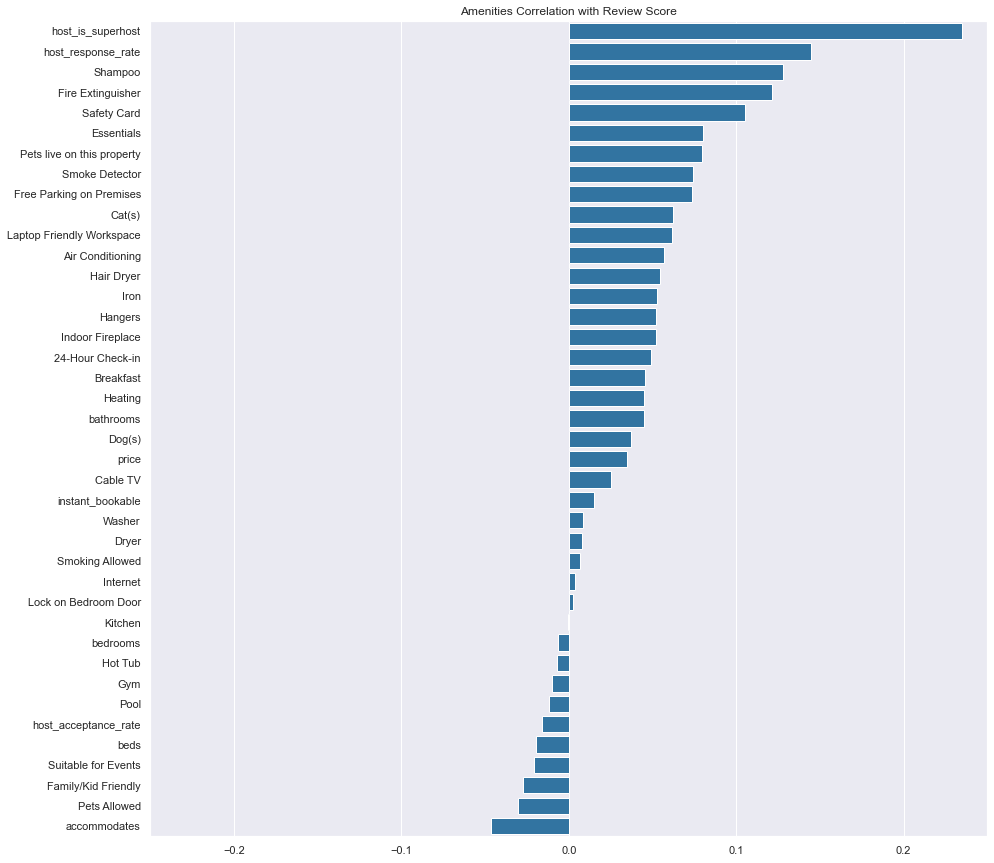

In [96]:
plt.figure(figsize=(15,15))
g = sns.barplot(y=rank_order.index,x=rank_order.values,orient="h",color='tab:blue')
plt.title("Amenities Correlation with Review Score")
g.set(xlim=(-.25, .25))
plt.show()

In [97]:
#rank_order.drop(labels='review_scores_rating',inplace=True)
#rank_order.plot(kind='barh',figsize=(10,10),xlim=(-.25,.25),title='Correlation of Amenities With Review Score')
